# Feature selection

Links úteis:<br>
https://machinelearningmastery.com/calculate-feature-importance-with-python/<br>
http://rasbt.github.io/mlxtend/user_guide/evaluate/feature_importance_permutation/<br>
https://mljar.com/blog/feature-importance-in-random-forest/<br>
https://www.scikit-yb.org/en/latest/api/model_selection/importances.html<br>
https://towardsdatascience.com/feature-selection-techniques-in-machine-learning-with-python-f24e7da3f36e<br>

-----------------------------

In [42]:
%matplotlib inline

import easygui
import seaborn as sns
import scipy.stats as ss
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
import ibmdbpy
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import mutual_info_classif, f_classif, mutual_info_regression, chi2, f_regression
from info_gain import info_gain

 
warnings.filterwarnings('ignore') 

---------------------------

In [43]:
df = pd.read_csv("iris.csv")

In [44]:
df.dtypes

sepal.length    float64
sepal.width     float64
petal.length    float64
petal.width     float64
variety          object
dtype: object

In [45]:
le = preprocessing.LabelEncoder()
for col in df.columns:
        if df[col].dtypes == 'object' :
            df[col] = le.fit_transform(df[col])


------------------------------------

In [46]:
df.dtypes

sepal.length    float64
sepal.width     float64
petal.length    float64
petal.width     float64
variety           int64
dtype: object

In [47]:
df_columns = list(df.columns)

In [48]:
Y_choiced = easygui.buttonbox("Qual coluna será seu Y ? Dica: Em alguns dataset's a coluna rotulada é a última muitas vezes.",title = "Escolher-Y", choices = df_columns )
easygui.msgbox ("Você escolheu coluna: " + Y_choiced)

'OK'

In [49]:
dataset = df.drop(columns = [Y_choiced])
labels = df[[Y_choiced]]

In [50]:
X_train, X_test, y_train, y_test = train_test_split(dataset, labels, test_size = 0.5)
X_train

,sepal.length,sepal.width,petal.length,petal.width
90,5.5,2.6,4.4,1.2
13,4.3,3.0,1.1,0.1
81,5.5,2.4,3.7,1.0
147,6.5,3.0,5.2,2.0
40,5.0,3.5,1.3,0.3
...,...,...,...,...
129,7.2,3.0,5.8,1.6
8,4.4,2.9,1.4,0.2
22,4.6,3.6,1.0,0.2
140,6.7,3.1,5.6,2.4


In [51]:
train_set = X_train.copy()
train_set[y_train.columns[0]] = y_train

In [52]:
X_train

,sepal.length,sepal.width,petal.length,petal.width
90,5.5,2.6,4.4,1.2
13,4.3,3.0,1.1,0.1
81,5.5,2.4,3.7,1.0
147,6.5,3.0,5.2,2.0
40,5.0,3.5,1.3,0.3
...,...,...,...,...
129,7.2,3.0,5.8,1.6
8,4.4,2.9,1.4,0.2
22,4.6,3.6,1.0,0.2
140,6.7,3.1,5.6,2.4


In [53]:
y_train

,variety
90,1
13,0
81,1
147,2
40,0
...,...
129,2
8,0
22,0
140,2


In [54]:
labels.dtypes

variety    int64
dtype: object

In [55]:
ch,_ =  chi2(dataset,labels)

In [56]:
ch

array([ 10.81782088,   3.7107283 , 116.31261309,  67.0483602 ])

In [57]:
ch = ss.rankdata(ch)
ch

array([2., 1., 4., 3.])

In [58]:
for col in labels.columns:
    if labels[col].dtypes == "int64":
        print("Labels discrete")
        mi = mutual_info_classif(dataset, labels)
        f,_ = f_classif(dataset, labels)
    else:
        print("Labels contionuos")
        mi = mutual_info_regression(dataset, labels)
        f,_ = f_regression(dataset, labels)

Labels discrete


In [59]:
print(mi)
print(f)

[0.48839118 0.24364464 0.98625727 0.98279859]
[ 119.26450218   49.16004009 1180.16118225  960.0071468 ]


In [60]:
ig = []
# iv = []
igr = []
for col in dataset.columns:
    print(col)
    ig.append(info_gain.info_gain(dataset[col],labels))
#     iv.append(info_gain.intrinsic_value(dataset[col],labels))
    igr.append(info_gain.info_gain_ratio(dataset[col],labels))

sepal.length
sepal.width
petal.length
petal.width


In [61]:
print(ig)
# print(iv)
print(igr)

[3.3423682425704624, 2.7886565850017035, 3.489697968721065, 2.807126229460098]
[69.35507139565254, 57.86540037312254, 72.41220422312901, 58.24865063673775]


In [62]:
feature_ranking = pd.DataFrame(ch, index = [dataset.columns], columns = ['ch'])

In [63]:
feature_ranking

,ch
sepal.length,2.0
sepal.width,1.0
petal.length,4.0
petal.width,3.0


In [64]:
feature_ranking["ig"] = ss.rankdata(ig)
feature_ranking["mi"] = ss.rankdata(mi)
feature_ranking["f"] = ss.rankdata(f)
feature_ranking["gr"] = ss.rankdata(igr)

In [65]:
feature_ranking

,ch,ig,mi,f,gr
sepal.length,2.0,3.0,2.0,2.0,3.0
sepal.width,1.0,1.0,1.0,1.0,1.0
petal.length,4.0,4.0,4.0,4.0,4.0
petal.width,3.0,2.0,3.0,3.0,2.0


In [66]:
feature_ranking["sum"] = feature_ranking.sum(axis=1)
feature_ranking

,ch,ig,mi,f,gr,sum
sepal.length,2.0,3.0,2.0,2.0,3.0,12.0
sepal.width,1.0,1.0,1.0,1.0,1.0,5.0
petal.length,4.0,4.0,4.0,4.0,4.0,20.0
petal.width,3.0,2.0,3.0,3.0,2.0,13.0


In [67]:
feature_ranking = feature_ranking.sort_values(by=['sum'], ascending = False)
feature_ranking.to_csv("fs.csv")

In [68]:
feature_ranking['sum'][0]
count = 0
for i in feature_ranking['sum']:
    if i > (feature_ranking['sum'][0]/2):
        count = count + 1
                                  
print(count)

3


In [69]:
columns = feature_ranking['sum'].index[0:count]
len(columns)

3

In [70]:
list_col = []
for i in columns:
    print(i[0])
    list_col.append(i[0])

petal.length
petal.width
sepal.length


In [80]:
col = dataset.columns

In [81]:
list(set(col) - set(list_col))

['sepal.width']

In [28]:
df[list_col]

,petal.length,petal.width,sepal.length
0,1.4,0.2,5.1
1,1.4,0.2,4.9
2,1.3,0.2,4.7
3,1.5,0.2,4.6
4,1.4,0.2,5.0
...,...,...,...
145,5.2,2.3,6.7
146,5.0,1.9,6.3
147,5.2,2.0,6.5
148,5.4,2.3,6.2


---------------------------------------

In [38]:
from sklearn.feature_selection import SelectKBest
#apply SelectKBest class to extract top 10 best features
bestfeatures = SelectKBest(score_func=chi2, k= len(dataset.columns))
fit = bestfeatures.fit(dataset,labels)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(dataset.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(len(dataset.columns),'Score'))  #print 10 best features

          Specs       Score
2  petal.length  116.312613
3   petal.width   67.048360
0  sepal.length   10.817821
1   sepal.width    3.710728


In [39]:
from sklearn.feature_selection import SelectKBest
#apply SelectKBest class to extract top 10 best features
bestfeatures = SelectKBest(score_func=mutual_info_classif, k= len(dataset.columns))
fit = bestfeatures.fit(dataset,labels)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(dataset.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(len(dataset.columns),'Score'))  #print 10 best features

          Specs     Score
2  petal.length  0.986088
3   petal.width  0.985225
0  sepal.length  0.530277
1   sepal.width  0.267592


In [42]:
from sklearn.feature_selection import SelectKBest
#apply SelectKBest class to extract top 10 best features
bestfeatures = SelectKBest(score_func=f_classif, k= len(dataset.columns))
fit = bestfeatures.fit(dataset,labels)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(dataset.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(len(dataset.columns),'Score'))  #print 10 best features

          Specs        Score
2  petal.length  1180.161182
3   petal.width   960.007147
0  sepal.length   119.264502
1   sepal.width    49.160040


------------------------------------------------

[0.08111624 0.05151478 0.38796402 0.47940496]


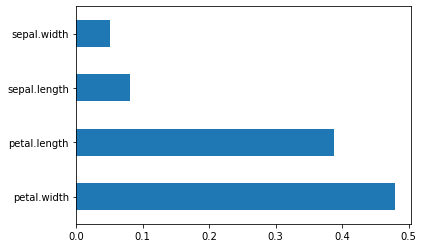

In [30]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(dataset,labels)
print(model.feature_importances_)
feat_importances = pd.Series(model.feature_importances_, index = dataset.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

[0.08006168 0.02092941 0.4392699  0.459739  ]


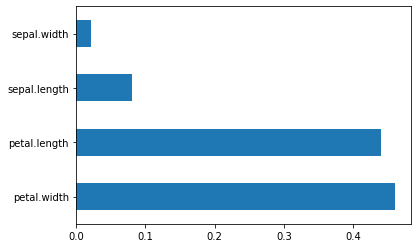

In [34]:
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
model = RandomForestClassifier()
model.fit(dataset,labels)
print(model.feature_importances_)
feat_importances = pd.Series(model.feature_importances_, index = dataset.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

[0.   0.   0.54 0.46]


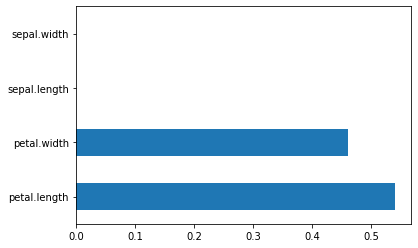

In [36]:
from sklearn.ensemble import AdaBoostClassifier
import matplotlib.pyplot as plt
model = AdaBoostClassifier()
model.fit(dataset,labels)
print(model.feature_importances_)
feat_importances = pd.Series(model.feature_importances_, index = dataset.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()